# Машинное обучение – весна 2024

# Домашнее задание 5 (бонус): Кластеризация


# Часть 1: K-Means (3 балла)


## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [ ]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [ ]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [ ]:
# ваш код здесь

Заполните пропуски нулями.

In [ ]:
# ваш код здесь

Нормализуйте данные при помощи `normalize`.

In [ ]:
from sklearn.preprocessing import normalize

# ваш код здесь

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [ ]:
from sklearn.cluster import KMeans

# ваш код здесь

Выведите на экран центры кластеров (центроиды)

In [ ]:
centroids = # ваш код здесь

# ваш код здесь

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).



Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [ ]:
from scipy import spatial

def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [ ]:
# ваш код здесь

**Вопрос:**
Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

**Ответ:** # ваш ответ здесь

# Часть 2: Сравнение алгоритмов кластеризации (3 балла)

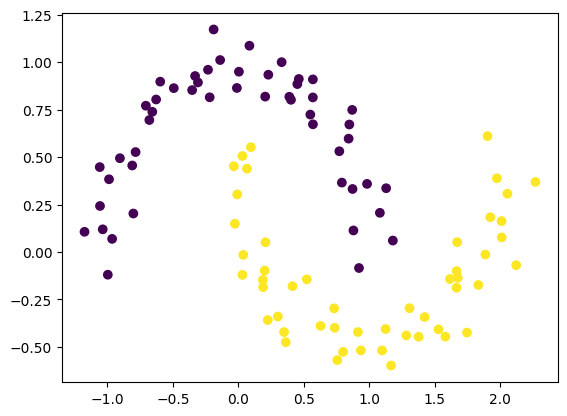

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans:



1.   Попробуйте подставить нужное количество кластеров
2.   Выберите количество кластеров с использованием индекса Силуэта





In [ ]:
from sklearn.metrics import silhouette_score
# ваш код здесь


Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

In [ ]:
# ваш код здесь

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single']

Подберите гиперпараметры:

1.   Дающие наилучший результат
2.   С использованием индекса Силуэта



In [ ]:
from sclearn.cluster import AgglomerativeClustering

# ваш код здесь

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте affinity='nearest_neighbors'. Рассмотрите гиперпараметр n_neighbors из диапазона [1,2,...,19].

Подберите гиперпараметры:

1.   Дающие наилучший результат
2.   С использованием индекса Силуэта

In [ ]:
from sklearn.cluster import SpectralClustering
# ваш код здесь

**Вопрос:** Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?

**Ответ:** # ваш ответ здесь


# Часть 3: DBSCAN своими руками (4 балла)


DBSCAN: Density-based spatial clustering of applications with noise

Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [ ]:
# Это может помочь вам для поиска дистанции между точками
from scipy.spatial import distance

In [ ]:
# Рекомендации -- это только рекомендации
import numpy as np
class dbscan:
    def __init__(self, eps, min_samples):
        # ваш код здесь

    def fit_predict(self, X):

        # Помечаем переданные точки, чтобы отличать уже кластеризованные
        # или являющиеся шумом от остальных
        self.visited = # ваш код здесь
        self.labels = # ваш код здесь

        # Реализуем цикл по точкам, игнорирущий уже кластеризованные
        for i in # ваш код здесь :
          # ваш код здесь

          # Если точка ещё не кластеризована, с помощью range_query() ищем её соседей
          neighbours = # ваш код здесь

          # Если соседей недостаточно, то помечаем её выделенным под шум лейблом
          # (однако она ещё может попасть в какой-то иной кластер)
          # ваш код здесь

          # Если же соседей достаточно, будем строить от неё кластер с помощью grow_cluster()
          if # ваш код здесь
             # ваш код здесь
             self.grow_cluster(i, neighbours)

        # Возвращаем лейблы кластеров
        return self.labels




    def grow_cluster(self, root, neighbours):
        # В этой функции мы полностью строим кластер относительно переданной точки
        # Т.е. реализуем цикл по структуре данных, изначально состоящей из уже
        # известных соседей (neighbours) и в процессе пополняющейся
        # "соседями соседей" с помощью range_query()

        # ваш код здесь


        while len(neighbours) > 0:
          # ваш код здесь
          new_neighbours = self.range_query(# ваш код здесь )
          # ваш код здесь



    def range_query(self, x):
        """Возвращает точки на расстоянии <= eps от x"""
        # С помощью функции dist()

        # ваш код здесь
        neighbours = set()
        for i in # ваш код здесь :
          # ваш код здесь
        return neighbours



    @staticmethod
    def dist(a, b):
        """Метрика расстояния"""
        # Попробуйте что-нибудь из scipy.spatial.distance
        # Базовый вариант -- Евклидова метрика

        # ваш код здесь

Проверим себя на простом примере:

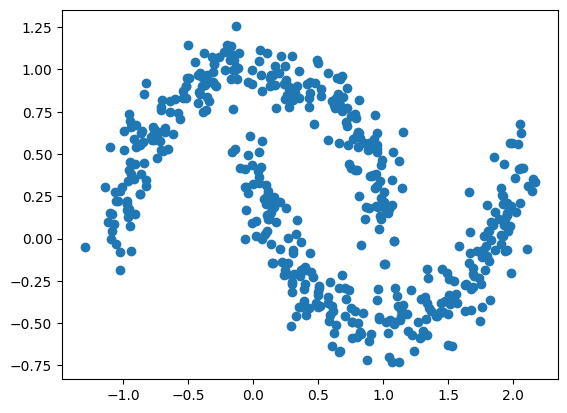

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте датасет с помощью своей версии DBSCAN:

In [ ]:
# ваш код здесь

Референс:

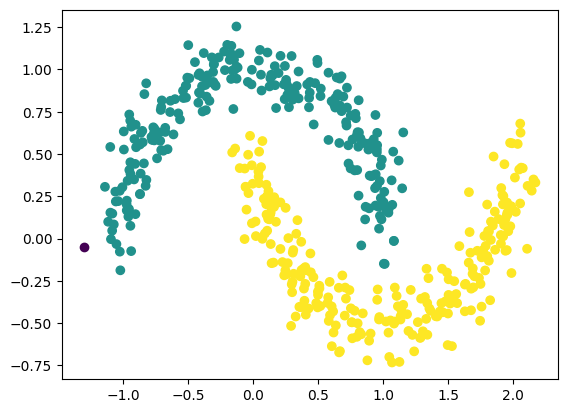

In [ ]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Придумайте один интересный пример кластеризации:

In [ ]:
# your code here

Картинки в качестве референса:

(Нужно несколько интересных соседствующих форм)



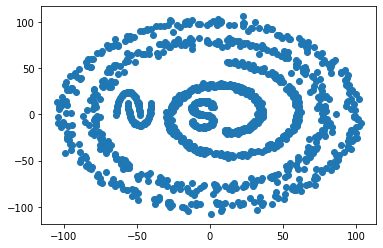

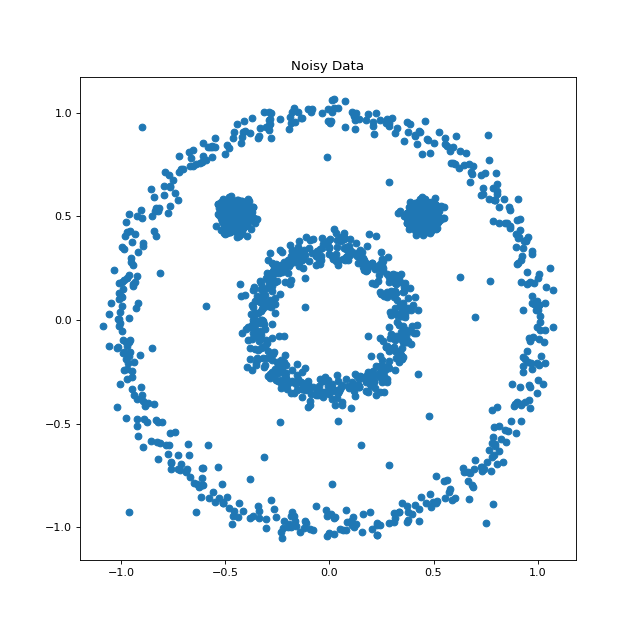
